# Neds Heating Options Cost Calculator

In [3]:
import numpy_financial as npf
from main import *
import numpy as np
np.set_printoptions(precision=2)

## Pre-amble

These calculations will be fairly sensitive to the parameters we set. I'm taking a couple of estimates here in making these. For example, T4 estimate our current heating energy usage as 9000 kWh / year. I'm estimating that we would want to increase this to 12000 kWh / year, as we move to heating the communal spaces. 

The key parameters we will depend on will be:
- The interest rate for our loan
- The price of electricity
- The amount of energy we use

## Set Parameters


In [4]:
scenario_1 = {
    'loan_years': 25,
    'rate': 5,
    'loan_amount': 40000,
    'heating_need': 22000 / 12,
    'electricity_price': .2,
    
}



In [5]:
give_summary(scenario_1)

Monthly loan payments would be £233.83601660319204 
Monthly heating bill would be £107.84313725490198 
Monthly total bill would be 341.679153858094

 Or, with just electric heating:
Monthly heating bill would be £366.6666666666667 


In [9]:
from ipywidgets import interact
import seaborn 
import pandas as pd
def f(x):
    xx = np.arange(x, 100)
    yy = [a ** 2 for a in xx]
    return seaborn.lineplot(x=xx, y=yy)

def make_cost_plot(loan_years,
                   rate,
                   loan_amount,
                   heating_need, ):
    scen_here = {'loan_years': loan_years,
    'rate': rate,
    'loan_amount': loan_amount,
    'heating_need': heating_need,
    'electricity_price': .18,}
    
    e_range = np.arange(.15, .7, .01)
    air_source_payments = []
    ordinary_payments = []
    for e in e_range:
        scen_here['electricity_price'] = e
        air_source_payments += [monthly_heat_source_bill(**scen_here)]
        ordinary_payments += [monthly_ordinary_heating_bill(**scen_here)]
    df = pd.DataFrame({
        'electricity': e_range,
        'Ordinary Price': ordinary_payments,
        'Air Source': air_source_payments
    }) 
    return df
       
    
        


In [24]:
df = make_cost_plot(
    loan_years=25,
    rate=5, 
    loan_amount=40000,
    heating_need=22000 / 12
)
df.head()
    # seaborn.lineplot(data=df, x='electricity', y='signal)

,electricity,Ordinary Price,Air Source
0,0.15,275.000000,80.882353
1,0.16,293.333333,86.274510
2,0.17,311.666667,91.666667
3,0.18,330.000000,97.058824
4,0.19,348.333333,102.450980


In [29]:
dfm = df.melt('electricity', var_name='Energy Type', value_name='Price') 
dfm.head()

,electricity,Energy Type,Price
0,0.15,Ordinary Price,275.000000
1,0.16,Ordinary Price,293.333333
2,0.17,Ordinary Price,311.666667
3,0.18,Ordinary Price,330.000000
4,0.19,Ordinary Price,348.333333


<AxesSubplot:xlabel='electricity', ylabel='Price'>

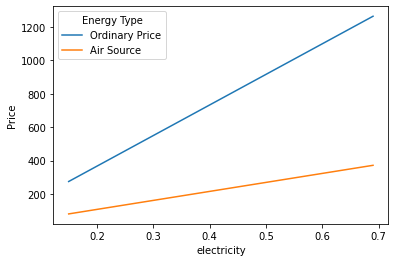

In [30]:
seaborn.lineplot(data=dfm, x='electricity', y='Price', hue='Energy Type')